In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#credit_data==='x'
#application_data==='y'

In [4]:
cd C:\Users\DELL\Downloads\Final one Hack\minor proj\minor proj\CreaditApproval

C:\Users\DELL\Downloads\Final one Hack\minor proj\minor proj\CreaditApproval


In [5]:
x=pd.read_csv("credit_record.csv")

In [6]:
x.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
x.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [8]:
x.index

RangeIndex(start=0, stop=1048575, step=1)

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
x.describe(percentiles=[0.5,0.65,1.0])

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
50%,5.062104e+06,-1.700000e+01
65%,5.091878e+06,-1.100000e+01
100%,5.150487e+06,0.000000e+00
max,5.150487e+06,0.000000e+00


In [11]:
x.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [12]:
x.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [13]:
x.count()

ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64

In [14]:
x.STATUS.count()

1048575

<h2>What is the distribution of credit statuses (e.g., "0" - paid off, "1" - one month delay, etc.)?
</h2>

In [15]:
x

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [16]:
status=x['STATUS'].value_counts()
status                           #each credit card status

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [17]:
#"0" - Paid off: 383120 occurrences
#"1" - One month delay: 11090 occurrences
#"2" - Two months delay: 868 occurrences
#"3" - Three months delay: 320 occurrences
#"C" - Closed accounts: 442031 occurrences
#"X" - Unknown or unspecified status: 209230 occurrences

<h2>How many unique individuals are represented in the dataset?</h2>

In [18]:
individuals=x['ID'].nunique()
individuals   

45985

<h2>What is the average number of months for which credit records are available per individual?</h2>

In [19]:
indi=x.groupby('ID')["MONTHS_BALANCE"].nunique()
indi

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: MONTHS_BALANCE, Length: 45985, dtype: int64

In [20]:
avg=indi.mean()
avg

22.802544307926496

In [21]:
x["STATUS"]

0          X
1          0
2          0
3          0
4          C
          ..
1048570    C
1048571    C
1048572    C
1048573    C
1048574    C
Name: STATUS, Length: 1048575, dtype: object

<h2>What is the most common credit status for each individual?</h2>

In [22]:
cmn_cr_sta=x["STATUS"].max()
cmn_cr_sta

'X'

In [23]:
mst_cmn_st=x.groupby('ID')['STATUS'].apply(lambda i: i.value_counts().idxmax())
mst_cmn_st

ID
5001711    0
5001712    0
5001713    X
5001714    X
5001715    X
          ..
5150482    0
5150483    X
5150484    0
5150485    0
5150487    C
Name: STATUS, Length: 45985, dtype: object

<h2>How many individuals have experienced a significant increase in credit delays over time?

</h2>

In [24]:
min_months_balance=x.groupby('ID')['MONTHS_BALANCE'].min()
print(min_months_balance)
max_months_balance=x.groupby('ID')['MONTHS_BALANCE'].max()
print(max_months_balance)

ID
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: MONTHS_BALANCE, Length: 45985, dtype: int64
ID
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: MONTHS_BALANCE, Length: 45985, dtype: int64


In [25]:
months_balance_difference = max_months_balance-min_months_balance
print(months_balance_difference)

ID
5001711     3
5001712    18
5001713    21
5001714    14
5001715    59
           ..
5150482    17
5150483    17
5150484    12
5150485     1
5150487    29
Name: MONTHS_BALANCE, Length: 45985, dtype: int64


In [26]:
significant_increase_individuals = months_balance_difference[months_balance_difference > 0]
significant_increase_individuals

ID
5001711     3
5001712    18
5001713    21
5001714    14
5001715    59
           ..
5150482    17
5150483    17
5150484    12
5150485     1
5150487    29
Name: MONTHS_BALANCE, Length: 45586, dtype: int64

In [27]:
num_significant_increase_individuals = len(significant_increase_individuals)
print("Number of individuals with a significant increase in credit delays:", num_significant_increase_individuals)

Number of individuals with a significant increase in credit delays: 45586


<h2>Is there a correlation between the duration of credit history and the credit status?

</h2>

In [28]:
# Calculate the duration of credit history for each individual
x['DURATION']=x.groupby('ID')['MONTHS_BALANCE'].transform(lambda i: i.nunique())
x["DURATION"]

0           4
1           4
2           4
3           4
4          19
           ..
1048570    30
1048571    30
1048572    30
1048573    30
1048574    30
Name: DURATION, Length: 1048575, dtype: int64

In [29]:
# Filter out non-numeric credit statuses
numeric_statuses = x['STATUS'].str.isnumeric()
x_filtered = x[numeric_statuses]
x_filtered

,ID,MONTHS_BALANCE,STATUS,DURATION
1,5001711,-1,0,4
2,5001711,-2,0,4
3,5001711,-3,0,4
13,5001712,-9,0,19
14,5001712,-10,0,19
...,...,...,...,...
1048540,5150484,-10,0,13
1048541,5150484,-11,0,13
1048542,5150484,-12,0,13
1048543,5150485,0,0,2


In [30]:
x_filtered['STATUS'] = x_filtered['STATUS'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\3054834567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_filtered['STATUS'] = x_filtered['STATUS'].astype(int)


In [31]:
average_credit_status_by_duration = x_filtered.groupby('DURATION')['STATUS'].mean()

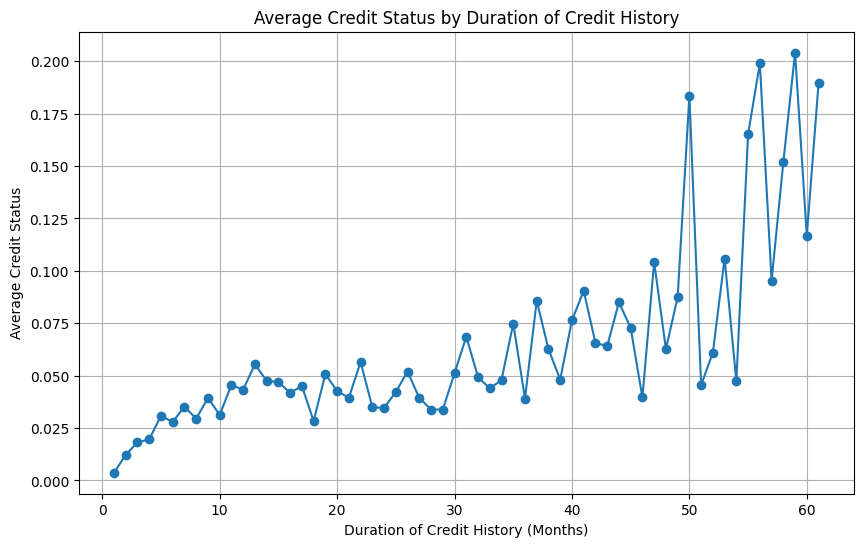

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(average_credit_status_by_duration.index, average_credit_status_by_duration.values, marker='o')
plt.xlabel('Duration of Credit History (Months)')
plt.ylabel('Average Credit Status')
plt.title('Average Credit Status by Duration of Credit History')
plt.grid(True)
plt.show()

<h2>How many months of credit history does the dataset cover?


</h2>

In [33]:
min_month=x['MONTHS_BALANCE'].min()
max_month=x['MONTHS_BALANCE'].max()

In [34]:
num_months_credit_history=max_month-min_month+1
print("Number of months of credit history covered by the dataset:", num_months_credit_history)

Number of months of credit history covered by the dataset: 61


<h2>What is the average credit delay across all individuals in the dataset?

</h2>

In [35]:
average_credit_delay=x[x['STATUS'].isin(['0', '1', '2', '3', '4', '5'])]['STATUS'].astype(int).mean()
average_credit_delay

0.05824863961501482

<h2>What is the most common credit status across all individuals?
</h2>

In [36]:
credit_status_counts = x['STATUS'].value_counts()
most_common_credit_status = credit_status_counts.idxmax()
most_common_credit_status

'C'

<h2>What is the maximum number of credit delays experienced by an individual in the dataset?

</h2>

In [37]:
numeric_statuses = x['STATUS'].str.isnumeric()
x_filtered = x[numeric_statuses]

In [38]:
x_filtered['STATUS'] = x_filtered['STATUS'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\3054834567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_filtered['STATUS'] = x_filtered['STATUS'].astype(int)


In [39]:
max_credit_delay_per_individual = x_filtered.groupby('ID')['STATUS'].max()
max_credit_delay = max_credit_delay_per_individual.max()
max_credit_delay

5

In [40]:
cd C:\Users\hp\Desktop\sai folders\Sai Teja Thatikonda\data science projects\datasets\Practice Dataset\CreaditApproval

[WinError 3] The system cannot find the path specified: 'C:\\Users\\hp\\Desktop\\sai folders\\Sai Teja Thatikonda\\data science projects\\datasets\\Practice Dataset\\CreaditApproval'
C:\Users\DELL\Downloads\Final one Hack\minor proj\minor proj\CreaditApproval


In [41]:
y=pd.read_csv("application_record.csv")
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [42]:
y.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,9.499000e+03,9499.000000,9.499000e+03,9499.000000,9499.000000,9499.0,9499.000000,9499.000000,9499.000000,9499.000000
mean,5.288713e+06,0.405095,1.934169e+05,-16087.580587,60952.472260,1.0,0.182440,0.295821,0.115696,2.182756
std,4.774709e+05,0.703090,1.092293e+05,4141.786639,139233.053399,0.0,0.386227,0.456435,0.319877,0.867194
min,5.008804e+06,0.000000,3.330000e+04,-25140.000000,-14338.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.021856e+06,0.000000,1.215000e+05,-19665.500000,-3234.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.024945e+06,0.000000,1.755000e+05,-15602.000000,-1583.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.471242e+06,1.000000,2.250000e+05,-12623.000000,-425.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.790437e+06,4.000000,1.350000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000


In [43]:
y.describe(percentiles=[0.125,0.5,0.65,0.75])

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,9.499000e+03,9499.000000,9.499000e+03,9499.000000,9499.000000,9499.0,9499.000000,9499.000000,9499.000000,9499.000000
mean,5.288713e+06,0.405095,1.934169e+05,-16087.580587,60952.472260,1.0,0.182440,0.295821,0.115696,2.182756
std,4.774709e+05,0.703090,1.092293e+05,4141.786639,139233.053399,0.0,0.386227,0.456435,0.319877,0.867194
min,5.008804e+06,0.000000,3.330000e+04,-25140.000000,-14338.000000,1.0,0.000000,0.000000,0.000000,1.000000
12.5%,5.010322e+06,0.000000,9.900000e+04,-21673.000000,-5145.000000,1.0,0.000000,0.000000,0.000000,1.000000
50%,5.024945e+06,0.000000,1.755000e+05,-15602.000000,-1583.000000,1.0,0.000000,0.000000,0.000000,2.000000
65%,5.029196e+06,0.000000,2.025000e+05,-13856.800000,-860.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.471242e+06,1.000000,2.250000e+05,-12623.000000,-425.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.790437e+06,4.000000,1.350000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000


In [44]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9499 non-null   int64  
 1   CODE_GENDER          9499 non-null   object 
 2   FLAG_OWN_CAR         9499 non-null   object 
 3   FLAG_OWN_REALITY     9499 non-null   object 
 4   CNT_CHILDREN         9499 non-null   int64  
 5   AMT_INCOME_TOTAL     9499 non-null   float64
 6   NAME_INCOME_TYPE     9499 non-null   object 
 7   NAME_EDUCATION_TYPE  9499 non-null   object 
 8   NAME_FAMILY_STATUS   9499 non-null   object 
 9   NAME_HOUSING_TYPE    9499 non-null   object 
 10  DAYS_BIRTH           9499 non-null   int64  
 11  DAYS_EMPLOYED        9499 non-null   int64  
 12  FLAG_MOBIL           9499 non-null   int64  
 13  FLAG_WORK_PHONE      9499 non-null   int64  
 14  FLAG_PHONE           9499 non-null   int64  
 15  FLAG_EMAIL           9499 non-null   i

In [45]:
y.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALITY          0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        2797
CNT_FAM_MEMBERS           0
dtype: int64

In [46]:
y.notnull().sum()

ID                     9499
CODE_GENDER            9499
FLAG_OWN_CAR           9499
FLAG_OWN_REALITY       9499
CNT_CHILDREN           9499
AMT_INCOME_TOTAL       9499
NAME_INCOME_TYPE       9499
NAME_EDUCATION_TYPE    9499
NAME_FAMILY_STATUS     9499
NAME_HOUSING_TYPE      9499
DAYS_BIRTH             9499
DAYS_EMPLOYED          9499
FLAG_MOBIL             9499
FLAG_WORK_PHONE        9499
FLAG_PHONE             9499
FLAG_EMAIL             9499
OCCUPATION_TYPE        6702
CNT_FAM_MEMBERS        9499
dtype: int64

In [47]:
y.shape

(9499, 18)

In [48]:
y.size

170982

In [49]:
y.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9494    False
9495    False
9496    False
9497    False
9498    False
Length: 9499, dtype: bool

In [50]:
y.dropna()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,6045613,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9491,6045614,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9492,6045615,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9493,6045616,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2


In [51]:
y.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALITY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [52]:
y.describe(include=object)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,9499,9499,9499,9499,9499,9499,9499,6702
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,6338,5709,6630,4768,6587,6639,8509,1622


In [53]:
# Get the distinct values of each column
for column in y.columns:
    unique_val=y[column].unique()
    print("unique values of {} are {}".format(column,unique_val))

unique values of ID are [5008804 5008805 5008806 ... 6045695 6045696 6045698]
unique values of CODE_GENDER are ['M' 'F']
unique values of FLAG_OWN_CAR are ['Y' 'N']
unique values of FLAG_OWN_REALITY are ['Y' 'N']
unique values of CNT_CHILDREN are [0 1 3 2 4]
unique values of AMT_INCOME_TOTAL are [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  2

In [54]:
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [55]:
# Get the distinct values of specified columns
spec_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
for col in spec_cols:
    uni_val=y[col].unique()
    print("----------------------------")
    print(col)
    print("----------------------------")
    for value in uni_val:
        print(value)

----------------------------
NAME_INCOME_TYPE
----------------------------
Working
Commercial associate
Pensioner
State servant
Student
----------------------------
NAME_EDUCATION_TYPE
----------------------------
Higher education
Secondary / secondary special
Incomplete higher
Lower secondary
Academic degree
----------------------------
NAME_FAMILY_STATUS
----------------------------
Civil marriage
Married
Single / not married
Separated
Widow
----------------------------
NAME_HOUSING_TYPE
----------------------------
Rented apartment
House / apartment
Municipal apartment
With parents
Co-op apartment
Office apartment
----------------------------
FLAG_MOBIL
----------------------------
1
----------------------------
FLAG_WORK_PHONE
----------------------------
1
0
----------------------------
FLAG_PHONE
----------------------------
0
1
----------------------------
FLAG_EMAIL
----------------------------
0
1
----------------------------
OCCUPATION_TYPE
----------------------------
nan
Se

In [56]:
#Filtering rows based on the presence of null values using the dropna() method:
filtered_dropna = y.dropna(axis=0) # default axis value is zero ==> rows with missing values are deleted
print("Total records Before:" , y.shape)
print("Total records After:" , filtered_dropna.shape)

Total records Before: (9499, 18)
Total records After: (6702, 18)


In [57]:
#Filtering rows based on the presence of null values using the dropna() method:

filtered_dropna_2 = y.dropna(axis=1) # ==> columns with missing values are deleted

print("Total records Before:" , y.shape)
print("Total records After:" , filtered_dropna_2.shape)

Total records Before: (9499, 18)
Total records After: (9499, 17)


In [58]:
dup_test = y[y.duplicated()]
dup_test.shape

(0, 18)

In [59]:
# Filter rows based on condition'AMT_INCOME_TOTAL' >= 250000
filtered_income_data = y[y['AMT_INCOME_TOTAL'] >=250000 ]
print("Total records:", len(filtered_income_data))
filtered_income_data.head()

Total records: 1993


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [60]:
# Using where condition
filtered_income_data2 = y.where(y['AMT_INCOME_TOTAL'] >= 250000)
print("Total records:", len(filtered_income_data2))
filtered_income_data2.head()

Total records: 9499


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804.0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805.0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5008808.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [61]:
# Filter rows where 'CODE_GENDER' is 'F'
filtered_female_data = y[y['CODE_GENDER'] == 'F' ]

print("Total records:", len(filtered_female_data))

filtered_female_data.head()

Total records: 6338


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1


In [62]:
# Filter rows where 'NAME_FAMILY_STATUS' is NOT 'Civil marriage', 'Married'
fam_status=y[~y["NAME_FAMILY_STATUS"].isin(["Civil marriage","Married"])]
fam_status

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9447,5476278,F,N,N,0,202500.0,Working,Secondary / secondary special,Widow,House / apartment,-15787,-2270,1,0,0,0,Laborers,1
9448,5476279,F,N,N,0,202500.0,Working,Secondary / secondary special,Widow,House / apartment,-15787,-2270,1,0,0,0,Laborers,1
9449,5476280,F,N,N,0,202500.0,Working,Secondary / secondary special,Widow,House / apartment,-15787,-2270,1,0,0,0,Laborers,1
9450,5476281,F,N,N,0,202500.0,Working,Secondary / secondary special,Widow,House / apartment,-15787,-2270,1,0,0,0,Laborers,1


In [63]:
# Filter rows where 'NAME_INCOME_TYPE' startswith 'Working'
name_inc=y[y["NAME_INCOME_TYPE"].str.startswith("Working")]
name_inc

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,6045613,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9491,6045614,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9492,6045615,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2
9493,6045616,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13605,-1329,1,0,0,0,Core staff,2


In [64]:
# Filering using "query" and "isin" filter male_car_owner where CODE_GENDER is M and FLAG_OWN_CAR in Y
male_car_owner=y.query('CODE_GENDER.isin(["M"]) & FLAG_OWN_CAR.isin(["Y"])')
male_car_owner

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,6196347,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9464,6196348,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9465,6196349,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9466,5033619,M,Y,N,0,126000.0,Working,Secondary / secondary special,Married,House / apartment,-8696,-172,1,0,0,0,Laborers,2


In [65]:
# Filering without isin
male_car_owners2=y.query('CODE_GENDER=="M" & FLAG_OWN_CAR=="Y"')
male_car_owners2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,6196347,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9464,6196348,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9465,6196349,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9466,5033619,M,Y,N,0,126000.0,Working,Secondary / secondary special,Married,House / apartment,-8696,-172,1,0,0,0,Laborers,2


In [66]:
# Filering using "loc" and columns range using ":"  ID TO CNT_CHILDREN
cols=y.loc[:,'ID':'CNT_CHILDREN']
cols

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN
0,5008804,M,Y,Y,0
1,5008805,M,Y,Y,0
2,5008806,M,Y,Y,0
3,5008808,F,N,Y,0
4,5008809,F,N,Y,0
...,...,...,...,...,...
9494,6045617,F,N,N,0
9495,5033628,F,N,Y,0
9496,6045695,F,N,Y,0
9497,6045696,F,N,Y,0


In [67]:
#onlu 5 rows


In [68]:
cols2=y.loc[0:4,'ID':'CNT_CHILDREN']
cols2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN
0,5008804,M,Y,Y,0
1,5008805,M,Y,Y,0
2,5008806,M,Y,Y,0
3,5008808,F,N,Y,0
4,5008809,F,N,Y,0


In [69]:
#all columns
cols3=y.loc[0:6, :]
cols3

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [70]:
# Filering specific columns

subset_data = y[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALITY', 'CNT_CHILDREN']]
subset_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN
0,5008804,M,Y,Y,0
1,5008805,M,Y,Y,0
2,5008806,M,Y,Y,0
3,5008808,F,N,Y,0
4,5008809,F,N,Y,0
...,...,...,...,...,...
9494,6045617,F,N,N,0
9495,5033628,F,N,Y,0
9496,6045695,F,N,Y,0
9497,6045696,F,N,Y,0


In [71]:
#filter male car owners and col range from 0 to 4
male_car_owner3=y.loc[(y["CODE_GENDER"]=="M") & (y["FLAG_OWN_CAR"]=="Y")].iloc[:,0:6]
print(len(male_car_owner3))
male_car_owner3.head()

2067


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL
0,5008804,M,Y,Y,0,427500.0
1,5008805,M,Y,Y,0,427500.0
2,5008806,M,Y,Y,0,112500.0
10,5008815,M,Y,Y,0,270000.0
11,5112956,M,Y,Y,0,270000.0


In [72]:
#filter using lambda
male_car_owner4=y[y.apply(lambda i:i['CODE_GENDER']=="M" and 'Y' in i["FLAG_OWN_CAR"],axis=1)]
male_car_owner4

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,6196347,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9464,6196348,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9465,6196349,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18661,-1845,1,1,0,0,Laborers,2
9466,5033619,M,Y,N,0,126000.0,Working,Secondary / secondary special,Married,House / apartment,-8696,-172,1,0,0,0,Laborers,2


In [73]:
# Accessing specific rows and columns using iloc
# Select the first three rows and the first two columns
rows_and_cols=y.iloc[0:3,0:2]
rows_and_cols

,ID,CODE_GENDER
0,5008804,M
1,5008805,M
2,5008806,M


In [74]:
#unique family status
y["NAME_FAMILY_STATUS"]

0             Civil marriage
1             Civil marriage
2                    Married
3       Single / not married
4       Single / not married
                ...         
9494                 Married
9495                 Married
9496                 Married
9497                 Married
9498                 Married
Name: NAME_FAMILY_STATUS, Length: 9499, dtype: object

In [75]:
unique_family_status=y[~y["NAME_FAMILY_STATUS"].duplicated()].loc[:,["NAME_FAMILY_STATUS"]]

In [76]:
unique_family_status

,NAME_FAMILY_STATUS
0,Civil marriage
2,Married
3,Single / not married
7,Separated
76,Widow


In [77]:
#top 10 income data
income_data=y[y["AMT_INCOME_TOTAL"].rank(ascending=False)<=10].loc[:,'ID':'AMT_INCOME_TOTAL']
income_data


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL
792,5009694,M,Y,N,0,1350000.0
793,5009695,M,Y,N,0,1350000.0
794,5009698,M,Y,N,0,1350000.0
795,5009699,M,Y,N,0,1350000.0
796,5009700,M,Y,N,0,1350000.0
797,5090752,M,Y,N,0,1350000.0
798,6153678,M,Y,N,0,1350000.0


In [78]:
y.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALITY        object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
dtype: object

In [79]:
filterd_num=y.select_dtypes(include='int').iloc[0:5,:]
filterd_num

,ID,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,-12005,-4542,1,1,0,0,2
1,5008805,0,-12005,-4542,1,1,0,0,2
2,5008806,0,-21474,-1134,1,0,0,0,2
3,5008808,0,-19110,-3051,1,0,1,1,1
4,5008809,0,-19110,-3051,1,0,1,1,1


In [80]:
filterd_num=y.select_dtypes(include='number').iloc[0:5,:]
filterd_num

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1


In [81]:
filterd_obj=y.select_dtypes(include='object').iloc[0:4,:]
filterd_obj

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


In [82]:
filterd_obj=y.select_dtypes(include='float').iloc[0:4,:]
filterd_obj

,AMT_INCOME_TOTAL
0,427500.0
1,427500.0
2,112500.0
3,270000.0


In [83]:
# Create new variable : age_in_years using DAYS_BIRTH
y["age_in_years"]=-round(y['DAYS_BIRTH']/365,0)
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,33.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,33.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,59.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,52.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,52.0


In [84]:
#now delete DAYS_BIRTH column
y.drop('DAYS_BIRTH', axis=1,inplace=True)

In [85]:
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0


In [86]:
# Create new variable : EXP_IN_YEARS using DAYS_EMPLOYED
y['EXP_IN_YEARS']=-round(y['DAYS_EMPLOYED']/365,0)

In [87]:
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0


In [88]:
#replace varibles with 0 and 1
y['CODE_GENDER']=y['CODE_GENDER'].replace(['F','M'],[0,1]) #0->F 1->M
y['FLAG_OWN_CAR']=y['FLAG_OWN_CAR'].replace(['N','Y'],[0,1]) #0->N 1->Y
y['FLAG_OWN_REALTY']=y['FLAG_OWN_REALITY'].replace(['N','Y'],[0,1])
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
0,5008804,1,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0,12.0,1
1,5008805,1,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2,33.0,12.0,1
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1


In [89]:
y=y.dropna(axis=0)
print(y.shape)

(6702, 20)


In [90]:
#VISUALIZATION

In [91]:
x

,ID,MONTHS_BALANCE,STATUS,DURATION
0,5001711,0,X,4
1,5001711,-1,0,4
2,5001711,-2,0,4
3,5001711,-3,0,4
4,5001712,0,C,19
...,...,...,...,...
1048570,5150487,-25,C,30
1048571,5150487,-26,C,30
1048572,5150487,-27,C,30
1048573,5150487,-28,C,30


In [92]:
y

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
5,5008810,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
6,5008811,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,6045613,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9491,6045614,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9492,6045615,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9493,6045616,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0


In [93]:
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
5,5008810,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
6,5008811,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1


In [94]:
merged_data = y.merge(x, on='ID', how='inner')
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY,MONTHS_BALANCE,STATUS,DURATION
0,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59.0,3.0,1,0,C,30
1,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59.0,3.0,1,-1,C,30
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59.0,3.0,1,-2,C,30
3,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59.0,3.0,1,-3,C,30
4,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,59.0,3.0,1,-4,C,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101881,5033626,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Core staff,2,37.0,4.0,0,-10,C,15
101882,5033626,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Core staff,2,37.0,4.0,0,-11,0,15
101883,5033626,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Core staff,2,37.0,4.0,0,-12,0,15
101884,5033626,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Core staff,2,37.0,4.0,0,-13,0,15


In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, classification_report
from keras.models import Sequential
from keras.layers import Dense


target_mapping = {
    "0": 1,  # Approved
    "1": 1,  # Approved
    "2": 1,  # Approved
    "3": 1,  # Approved
    "C": 0,  # Denied
    "X": 0   # Denied
}
x['target'] = x['STATUS'].map(target_mapping)
a = merged_data.drop('STATUS', axis=1)
b = merged_data['STATUS']

In [96]:
x.head()

,ID,MONTHS_BALANCE,STATUS,DURATION,target
0,5001711,0,X,4,0.0
1,5001711,-1,0,4,1.0
2,5001711,-2,0,4,1.0
3,5001711,-3,0,4,1.0
4,5001712,0,C,19,0.0


In [97]:
y

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
5,5008810,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
6,5008811,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,6045613,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9491,6045614,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9492,6045615,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0
9493,6045616,0,0,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1329,1,0,0,0,Core staff,2,37.0,4.0,0


In [98]:
y.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
5,5008810,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1
6,5008811,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1,52.0,8.0,1


In [99]:
import pandas as pd

# Merge datasets based on the 'ID' column
merged_data = x.merge(y, on='ID', how='inner')


In [100]:
merged_data

,ID,MONTHS_BALANCE,STATUS,DURATION,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
0,5008806,0,C,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
1,5008806,-1,C,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
2,5008806,-2,C,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008806,-3,C,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
4,5008806,-4,C,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101881,5113231,-9,0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101882,5113231,-10,0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101883,5113231,-11,0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101884,5113231,-12,0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1


In [101]:
status_mapping = {
    "0": 1,  # Approved
    "1": 1,  # Approved
    "2": 1,  # Approved
    "3": 1,  # Approved
    "C": 0,  # Denied
    "X": 0   # Denied
}

# Use the map function to apply the mapping to the STATUS column
merged_data['STATUS'] = merged_data['STATUS'].map(status_mapping)


In [102]:
merged_data['STATUS']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
101881    1.0
101882    1.0
101883    1.0
101884    1.0
101885    1.0
Name: STATUS, Length: 101886, dtype: float64

In [103]:
merged_data

,ID,MONTHS_BALANCE,STATUS,DURATION,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
0,5008806,0,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
1,5008806,-1,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
2,5008806,-2,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008806,-3,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
4,5008806,-4,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101881,5113231,-9,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101882,5113231,-10,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101883,5113231,-11,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101884,5113231,-12,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1


In [104]:
z=pd.read_csv("application_record.csv")

In [105]:
merged_data['NAME_INCOME_TYPE'] = z['NAME_INCOME_TYPE']

In [106]:
merged_data

,ID,MONTHS_BALANCE,STATUS,DURATION,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
0,5008806,0,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
1,5008806,-1,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
2,5008806,-2,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008806,-3,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
4,5008806,-4,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101881,5113231,-9,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101882,5113231,-10,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101883,5113231,-11,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1
101884,5113231,-12,1.0,10,1.0,1,1,Y,1,225000.0,...,-4205,1,0,0,0,Laborers,3,31.0,12.0,1


In [107]:
merged_data=merged_data.dropna()

In [108]:
merged_data

,ID,MONTHS_BALANCE,STATUS,DURATION,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALITY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age_in_years,EXP_IN_YEARS,FLAG_OWN_REALTY
0,5008806,0,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
1,5008806,-1,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
2,5008806,-2,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
3,5008806,-3,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
4,5008806,-4,0.0,30,0.0,1,1,Y,0,112500.0,...,-1134,1,0,0,0,Security staff,2,59.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,5009559,-35,1.0,43,1.0,0,0,N,0,198000.0,...,-9748,1,0,0,0,Laborers,2,52.0,27.0,0
9495,5009559,-36,1.0,43,1.0,0,0,N,0,198000.0,...,-9748,1,0,0,0,Laborers,2,52.0,27.0,0
9496,5009559,-37,1.0,43,1.0,0,0,N,0,198000.0,...,-9748,1,0,0,0,Laborers,2,52.0,27.0,0
9497,5009559,-38,0.0,43,0.0,0,0,N,0,198000.0,...,-9748,1,0,0,0,Laborers,2,52.0,27.0,0


In [109]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_data['OCCUPATION_TYPE'] = label_encoder.fit_transform(merged_data['OCCUPATION_TYPE'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\2244200649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OCCUPATION_TYPE'] = label_encoder.fit_transform(merged_data['OCCUPATION_TYPE'])


In [110]:
merged_data['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(merged_data['NAME_HOUSING_TYPE'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\2906795400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(merged_data['NAME_HOUSING_TYPE'])


In [111]:
merged_data['STATUS'] = label_encoder.fit_transform(merged_data['STATUS'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\1790558110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['STATUS'] = label_encoder.fit_transform(merged_data['STATUS'])


In [112]:
merged_data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(merged_data['NAME_INCOME_TYPE'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\2921148582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(merged_data['NAME_INCOME_TYPE'])


In [113]:
merged_data['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(merged_data['NAME_EDUCATION_TYPE'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\3913678515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(merged_data['NAME_EDUCATION_TYPE'])


In [114]:
merged_data['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(merged_data['NAME_FAMILY_STATUS'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\1454549156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(merged_data['NAME_FAMILY_STATUS'])


In [115]:
merged_data['FLAG_OWN_REALITY'] = label_encoder.fit_transform(merged_data['FLAG_OWN_REALITY'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\2233933786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['FLAG_OWN_REALITY'] = label_encoder.fit_transform(merged_data['FLAG_OWN_REALITY'])


In [116]:
#logistic regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, classification_report

# features (X) and target variable (y)
X = merged_data.drop('target', axis=1)  #  'target' is the name of our binary target variable
y = merged_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")   
print(f"F1 Score: {f1}")        
print(f"Precision: {precision}")  
print(f"Recall: {recall}")       
print(f"ROC AUC: {roc_auc}")     #discriminate blw pos and neg classes across diff threshold values 
print(f"Mean Squared Error: {mse}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.6005263157894737
F1 Score: 0.22153846153846152
Precision: 0.6467065868263473
Recall: 0.13366336633663367
ROC AUC: 0.5398170311536649
Mean Squared Error: 0.3994736842105263
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.95      0.73      1092
         1.0       0.65      0.13      0.22       808

    accuracy                           0.60      1900
   macro avg       0.62      0.54      0.48      1900
weighted avg       0.62      0.60      0.51      1900



In [117]:
#decision trees
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
X = merged_data.drop(columns=['STATUS'])
y = merged_data['STATUS']
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900



In [118]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = merged_data.drop(columns=['STATUS'])
y = merged_data['STATUS']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900



In [119]:
# missing data in the dataset
missing_data = merged_data.isnull().sum()
print("Missing Data:")
print(missing_data)


Missing Data:
ID                     0
MONTHS_BALANCE         0
STATUS                 0
DURATION               0
target                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALITY       0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
age_in_years           0
EXP_IN_YEARS           0
FLAG_OWN_REALTY        0
dtype: int64


In [120]:
#outlier
columns_to_check = ['AMT_INCOME_TOTAL', 'STATUS']
z_scores = np.abs((merged_data[columns_to_check] - merged_data[columns_to_check].mean()) / merged_data[columns_to_check].std())
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
outlier_data = merged_data[outliers]

print("Outliers:")
print(outlier_data)


Outliers:
           ID  MONTHS_BALANCE  STATUS  DURATION  target  CODE_GENDER  \
3321  5009092               0       1         4     1.0            1   
3322  5009092              -1       1         4     1.0            1   
3323  5009092              -2       1         4     1.0            1   
3324  5009092              -3       1         4     1.0            1   
3325  5009094               0       1         4     1.0            1   
3326  5009094              -1       1         4     1.0            1   
3327  5009094              -2       1         4     1.0            1   
3328  5009094              -3       1         4     1.0            1   
3329  5009095               0       1         4     1.0            1   
3330  5009095              -1       1         4     1.0            1   
3331  5009095              -2       1         4     1.0            1   
3332  5009095              -3       1         4     1.0            1   
6981  5009359               0       0        16     0.

In [121]:
# #svm
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report
# svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
# svm_classifier.fit(X_train, y_train)
# y_pred = svm_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# classification_rep = classification_report(y_test, y_pred)
# print("Classification Report:\n", classification_rep)

In [122]:
#deep learning
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([     #whixh allows us to build model layer by layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
y_pred = model.predict(X_test)

Epoch 1/20
119/119 [==============================] - 4s 8ms/step - loss: 26021.6387 - accuracy: 0.5197 - val_loss: 3356.7783 - val_accuracy: 0.4253
Epoch 2/20
119/119 [==============================] - 1s 5ms/step - loss: 3176.5339 - accuracy: 0.5223 - val_loss: 1745.0074 - val_accuracy: 0.4253
Epoch 3/20
119/119 [==============================] - 1s 5ms/step - loss: 5320.3862 - accuracy: 0.5141 - val_loss: 795.9682 - val_accuracy: 0.5821
Epoch 4/20
119/119 [==============================] - 1s 4ms/step - loss: 6786.8555 - accuracy: 0.5186 - val_loss: 5525.3809 - val_accuracy: 0.5768
Epoch 5/20
119/119 [==============================] - 1s 5ms/step - loss: 5202.3550 - accuracy: 0.5081 - val_loss: 4198.8413 - val_accuracy: 0.4253
Epoch 6/20
119/119 [==============================] - 1s 5ms/step - loss: 2705.2122 - accuracy: 0.5201 - val_loss: 10484.4502 - val_accuracy: 0.4253
Epoch 7/20
119/119 [==============================] - 1s 5ms/step - loss: 4631.6743 - accuracy: 0.5219 - val_lo

In [123]:
x1=pd.read_csv("credit_record.csv")

In [124]:
y1=pd.read_csv("application_record.csv")

In [125]:
merged_data2 = x1.merge(y1, on='ID', how='inner')


In [126]:
import seaborn as sns

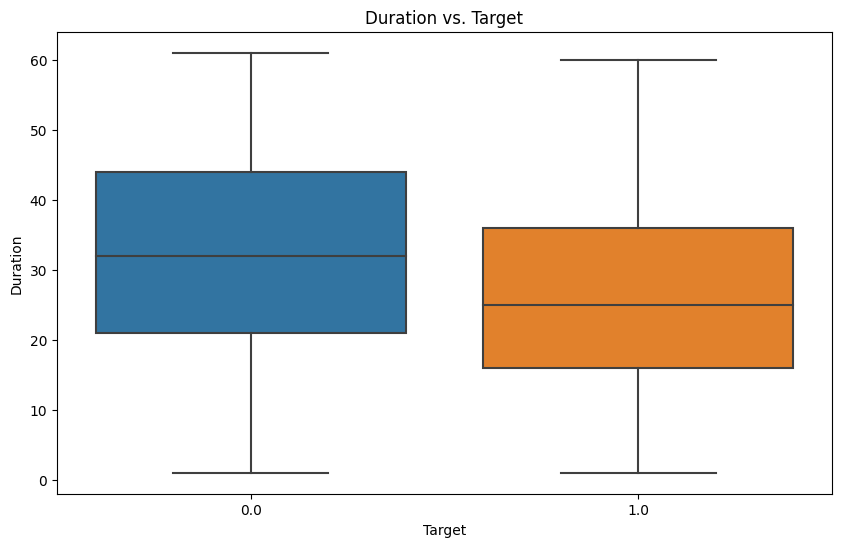

In [127]:
# Example 8: Duration vs. Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='target', y='DURATION')
plt.title('Duration vs. Target')
plt.xlabel('Target')
plt.ylabel('Duration')
plt.show()


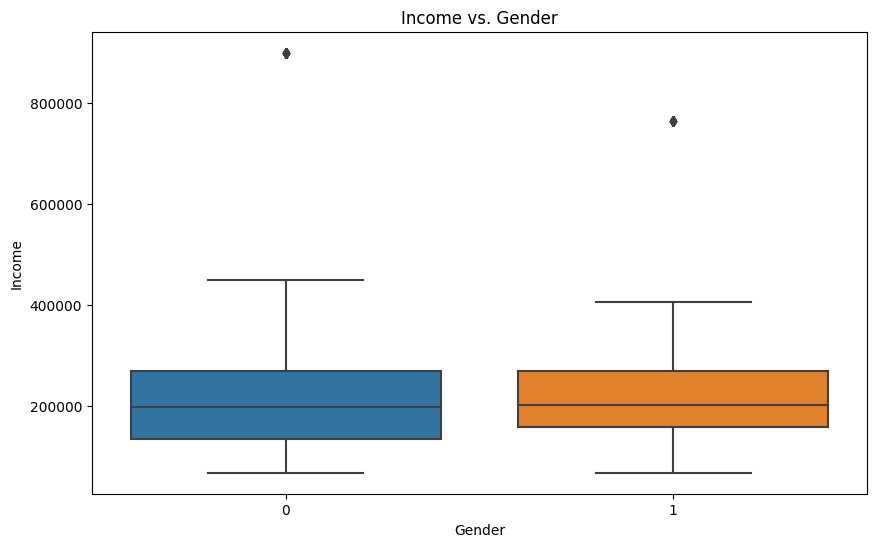

In [128]:

# Example 9: Income vs. Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='CODE_GENDER', y='AMT_INCOME_TOTAL')
plt.title('Income vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


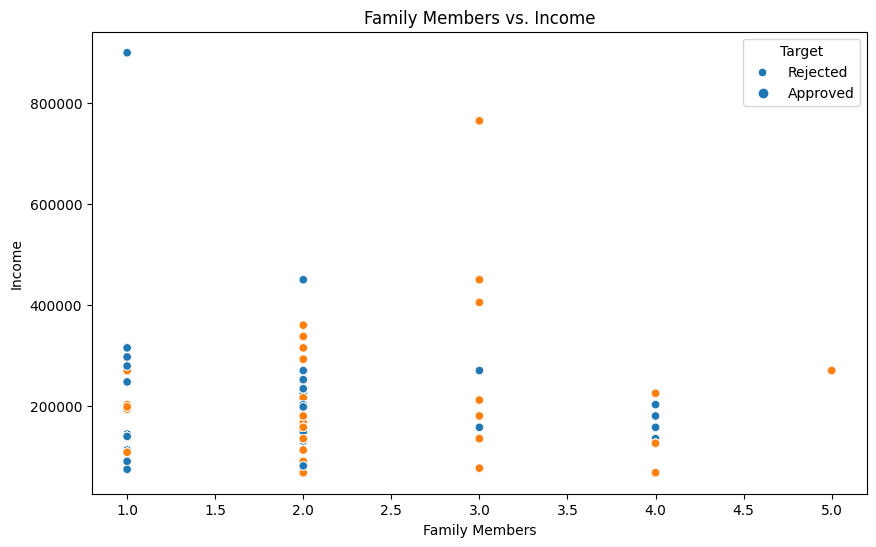

In [129]:

# Example 10: Family Members vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', hue='target')
plt.title('Family Members vs. Income')
plt.xlabel('Family Members')
plt.ylabel('Income')
plt.legend(title='Target', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()


In [130]:
!pip install xgboost

In [131]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")


XGBoost Accuracy: 1.0


In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras

# Load your dataset (replace 'data.csv' with your dataset file)

# Split the dataset into features (X) and target variable (y)
X = merged_data.drop('target', axis=1)
y = merged_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (only for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Deep Learning with TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=1)

y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype(int)
dl_accuracy = accuracy_score(y_test, y_pred_dl)
print(f"Deep Learning Accuracy: {dl_accuracy}")

# Mean Squared Error for Deep Learning
mse_dl = mean_squared_error(y_test, y_pred_dl)
print(f"Mean Squared Error for Deep Learning: {mse_dl}")


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
Epoch 1/10
119/119 [==============================] - 2s 4ms/step - loss: 0.3911 - accuracy: 0.8479
Epoch 2/10
119/119 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9999
Epoch 3/10
119/119 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 4/10
119/119 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/10
119/119 [==============================] - 0s 4ms/step - loss: 7.6164e-04 - accuracy: 1.0000
Epoch 6/10
119/119 [==============================] - 0s 3ms/step - loss: 4.8422e-04 - accuracy: 1.0000
Epoch 7/10
119/119 [==============================] - 0s 4ms/step - loss: 3.3210e-04 - accuracy: 1.0000
Epoch 8/10
119/119 [==============================] - 0s 3ms/step - loss: 2.4026e-04 - accuracy: 1.0000
Epoch 9/10
119/119 [==============================] - 0s 3ms/step - loss: 1.8068e-04 - accurac

In [133]:
! pip install torch

In [134]:

import torch
import torch.nn as nn
import torch.optim as optim

# Define a custom neural network
class CustomNN(nn.Module):
    def __init__(self):
        super(CustomNN, self).__init__()
        self.fc1 = nn.Linear(X_train_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Create an instance of the custom neural network
model = CustomNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop and evaluation
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.FloatTensor(X_train_scaled))
    loss = criterion(outputs, torch.FloatTensor(y_train.values).view(-1, 1))
    loss.backward()
    optimizer.step()

model.eval()
y_pred_nn = (model(torch.FloatTensor(X_test_scaled)).detach().numpy() > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy}")


Neural Network Accuracy: 0.6915789473684211


In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_estimator = random_search.best_estimator_

accuracy = best_estimator.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", accuracy)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Accuracy on Test Data: 1.0


In [136]:
x

,ID,MONTHS_BALANCE,STATUS,DURATION,target
0,5001711,0,X,4,0.0
1,5001711,-1,0,4,1.0
2,5001711,-2,0,4,1.0
3,5001711,-3,0,4,1.0
4,5001712,0,C,19,0.0
...,...,...,...,...,...
1048570,5150487,-25,C,30,0.0
1048571,5150487,-26,C,30,0.0
1048572,5150487,-27,C,30,0.0
1048573,5150487,-28,C,30,0.0


In [137]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

X_train = np.hstack((X_train, np.zeros((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.zeros((X_test.shape[0], 1))))


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(24,), kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
190/190 [==============================] - 3s 6ms/step - loss: 37130.2500 - accuracy: 0.5076 - val_loss: 329.2821 - val_accuracy: 0.3934
Epoch 2/10
190/190 [==============================] - 1s 5ms/step - loss: 1019.6984 - accuracy: 0.5113 - val_loss: 29.8825 - val_accuracy: 0.6066
Epoch 3/10
190/190 [==============================] - 1s 4ms/step - loss: 196.1079 - accuracy: 0.5139 - val_loss: 19.1778 - val_accuracy: 0.6066
Epoch 4/10
190/190 [==============================] - 1s 4ms/step - loss: 99.1909 - accuracy: 0.5231 - val_loss: 0.9822 - val_accuracy: 0.3862
Epoch 5/10
190/190 [==============================] - 1s 5ms/step - loss: 51.3088 - accuracy: 0.5346 - val_loss: 0.6851 - val_accuracy: 0.6066
Epoch 6/10
190/190 [==============================] - 1s 5ms/step - loss: 31.2813 - accuracy: 0.5382 - val_loss: 0.6829 - val_accuracy: 0.6066
Epoch 7/10
190/190 [==============================] - 1s 4ms/step - loss: 35.1710 - accuracy: 0.5517 - val_loss: 0.6808 - val_accura

In [138]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 1.0


In [157]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Gradient Boosting Accuracy: {gbm_accuracy}")


Gradient Boosting Accuracy: 1.0


In [158]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")

# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Gradient Boosting Accuracy: {gbm_accuracy}")


SVM Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [159]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")

# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Gradient Boosting Accuracy: {gbm_accuracy}")


SVM Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
print(y_train.value_counts())


target
0.0    4475
1.0    3124
Name: count, dtype: int64


In [162]:
from sklearn.metrics import classification_report

# Logistic Regression
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

# Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# SVM
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))

# GBM
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print(classification_report(y_test, y_pred_gbm))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900

              preci

In [163]:
!pip install imblearn

In [164]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [165]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Instantiate the grid search model
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [166]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [167]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900

Accuracy: 1.0


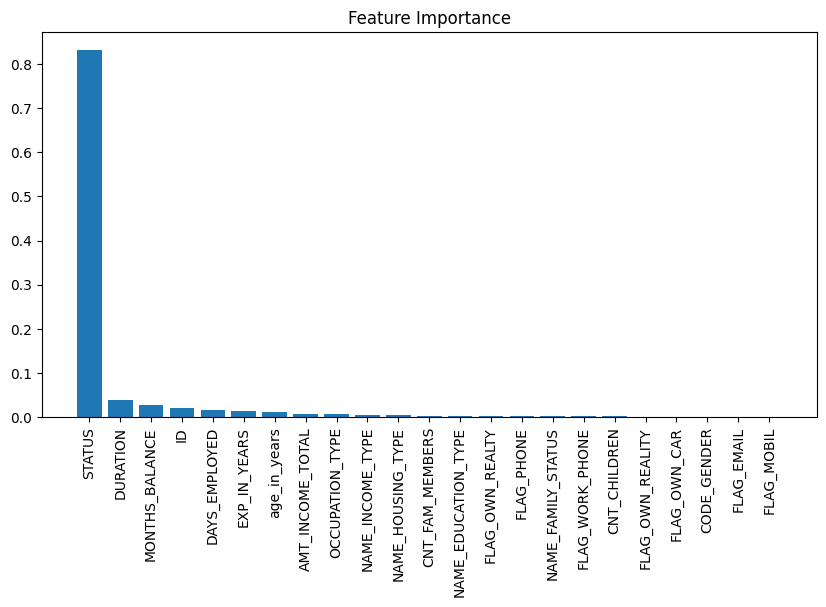

In [168]:
# Get feature importances
importances = best_estimator.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


In [169]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1092
         1.0       1.00      1.00      1.00       808

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900



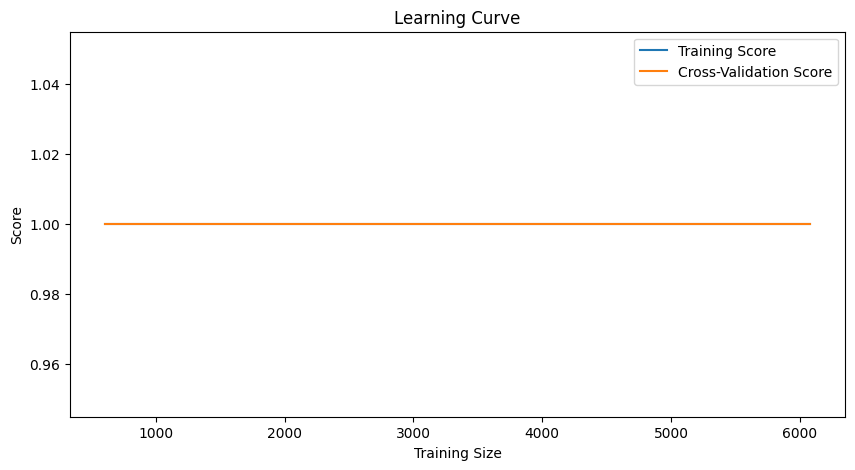

In [170]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train, y_train, cv=5)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [171]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
print(cm)


[[1092    0]
 [   0  808]]


In [172]:
import pickle
from sklearn.ensemble import RandomForestClassifier

pickle.dump(random_forest, open('credit_card_approval_model.pkl', 'wb'))

In [173]:
cd D:\minor proj\CreaditApproval

[WinError 3] The system cannot find the path specified: 'D:\\minor proj\\CreaditApproval'
C:\Users\DELL\Downloads\Final one Hack\minor proj\minor proj\CreaditApproval


In [174]:
import pickle
import numpy as np

# Load the saved model
filename = 'credit_card_approval_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Sample input data
data = {
    'CODE_GENDER': 'M',
    'FLAG_OWN_CAR': 'Yes',
    'FLAG_OWN_REALITY': 'Yes',
    'CNT_CHILDREN': 2,
    'AMT_INCOME_TOTAL': 50000,
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Higher education',
    'NAME_FAMILY_STATUS': 'Civil marriage',
    'NAME_HOUSING_TYPE': 'Rented apartment',
    'DAYS_BIRTH': -12005,
    'DAYS_EMPLOYED': -4542,
    'FLAG_MOBIL': 1,
    'FLAG_WORK_PHONE': 1,
    'FLAG_PHONE': 0,
    'FLAG_EMAIL': 0,
    'OCCUPATION_TYPE': 'Security staff',
    'CNT_FAM_MEMBERS': 2
}

# Define mappings
income_type_mapping = {
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Student': 4
}

education_mapping = {
    'Higher education': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Lower secondary': 3,
    'Academic degree': 4
}

family_status_mapping = {
    'Civil marriage': 0,
    'Married': 1,
    'Single / not married': 2,
    'Separated': 3,
    'Widow': 4
}

housing_type_mapping = {
    'Rented apartment': 0,
    'House / apartment': 1,
    'Municipal apartment': 2,
    'With parents': 3,
    'Co-op apartment': 4,
    'Office apartment': 5
}

occupation_mapping = {
    'Security staff': 0,
    'Sales staff': 1,
    'Accountants': 2,
    'Laborers': 3,
    'Managers': 4,
    'Drivers': 5,
    'Core staff': 6,
    'High skill tech staff': 7,
    'Cleaning staff': 8,
    'Private service staff': 9,
    'Cooking staff': 10,
    'Low-skill Laborers': 11,
    'Waiters/barmen staff': 12,
    'Medicine staff': 13,
    'Secretaries': 14,
    'HR staff': 15,
    'IT staff': 16
}

# Convert categorical data to numerical using the mappings
data['CODE_GENDER'] = 1 if data['CODE_GENDER'] == 'M' else 0
data['FLAG_OWN_CAR'] = 1 if data['FLAG_OWN_CAR'] == 'Yes' else 0
data['FLAG_OWN_REALITY'] = 1 if data['FLAG_OWN_REALITY'] == 'Yes' else 0
data['NAME_INCOME_TYPE'] = income_type_mapping[data['NAME_INCOME_TYPE']]
data['NAME_EDUCATION_TYPE'] = education_mapping[data['NAME_EDUCATION_TYPE']]
data['NAME_FAMILY_STATUS'] = family_status_mapping[data['NAME_FAMILY_STATUS']]
data['NAME_HOUSING_TYPE'] = housing_type_mapping[data['NAME_HOUSING_TYPE']]
data['OCCUPATION_TYPE'] = occupation_mapping[data['OCCUPATION_TYPE']]

# Prepare the features with all 23 features
features = np.array([
    data['CODE_GENDER'], data['FLAG_OWN_CAR'], data['FLAG_OWN_REALITY'],
    data['CNT_CHILDREN'], data['AMT_INCOME_TOTAL'], data['NAME_INCOME_TYPE'],
    data['NAME_EDUCATION_TYPE'], data['NAME_FAMILY_STATUS'], data['NAME_HOUSING_TYPE'],
    data['DAYS_BIRTH'], data['DAYS_EMPLOYED'], data['FLAG_MOBIL'], data['FLAG_WORK_PHONE'],
    data['FLAG_PHONE'], data['FLAG_EMAIL'], data['OCCUPATION_TYPE'], data['CNT_FAM_MEMBERS'],
    0, 0, 0, 0, 0, 0  # Add placeholders for the missing features
]).reshape(1, -1)

# Predict
prediction = model.predict(features)
prediction_probability = model.predict_proba(features)

print(f"Predicted Class: {prediction[0]}")
print(f"Predicted Probabilities: {prediction_probability[0]}")


Predicted Class: 1.0
Predicted Probabilities: [0.06 0.94]


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [175]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

# Assuming X_cc_train_prep and y_cc_train_prep are your training data

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_cc_train_prep, y_cc_train_prep)

# Define the directory and file path
directory = 'saved_models/random_forest/'
file_path = os.path.join(directory, 'random_forest_model.pkl')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model
joblib.dump(random_forest, file_path)

print("Random Forest model trained and saved successfully!")


NameError: name 'X_cc_train_prep' is not defined